In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import librosa

In [2]:
DATADIR = "data/"
CATEGORIES = ["Segmented_Laugh", "Segmented_NonLaugh2"]

In [3]:
#creates training data
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) 
        class_num = CATEGORIES.index(category)
        for aud in os.listdir(path):
            if aud == '.DS_Store':
                continue
            aud_array , sr = librosa.load(os.path.join(path,aud), sr=None)
            mfccs = librosa.feature.mfcc(aud_array, sr=sr)
            if mfccs.shape[1] == 16:
                training_data.append([mfccs[0:6,:].reshape(-1,1), class_num])
            
create_training_data()

In [4]:
random.shuffle(training_data)#shuffles the training data

In [5]:
X = []
y = []

In [6]:
for features, label in training_data:
    X.append(features)
    y.append(label)

    
X = np.array(X).reshape(-1,16,6)#-1 corresponds to how many features we have
y = np.array(y)
#X = X/250

In [7]:
X = X/100#normalizing X

In [8]:
np.min(X)

-3.717114

In [9]:
np.array(y).shape[0]

4302

# FC NN

In [10]:
import tensorflow as tf

In [11]:
model = tf.keras.models.Sequential()#start a sequential model

model.add(tf.keras.layers.Flatten())#This is our input layer
model.add(tf.keras.layers.Dense(20, activation = tf.nn.relu))#This is first hidden layer
#model.add(tf.keras.layers.Dense(6, activation = tf.nn.relu))#This is first hidden layer
#model.add(tf.keras.layers.Dense(4, activation = tf.nn.relu))#This is first hidden layer
model.add(tf.keras.layers.Dense(2, activation = tf.nn.softmax))#2 stands for number of classes

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X, np.array(y), batch_size = 32 , epochs = 100, validation_split = 0.2, verbose=1)

Train on 3441 samples, validate on 861 samples
Epoch 1/100
3441/3441 [==============================] - 1s 292us/sample - loss: 0.6061 - accuracy: 0.6806 - val_loss: 0.5418 - val_accuracy: 0.7317
Epoch 2/100
3441/3441 [==============================] - 0s 103us/sample - loss: 0.5092 - accuracy: 0.7422 - val_loss: 0.5087 - val_accuracy: 0.7584
Epoch 3/100
3441/3441 [==============================] - 0s 81us/sample - loss: 0.4847 - accuracy: 0.7597 - val_loss: 0.5003 - val_accuracy: 0.7654
Epoch 4/100
3441/3441 [==============================] - 0s 67us/sample - loss: 0.4700 - accuracy: 0.7722 - val_loss: 0.4821 - val_accuracy: 0.7851
Epoch 5/100
3441/3441 [==============================] - 0s 80us/sample - loss: 0.4576 - accuracy: 0.7847 - val_loss: 0.4766 - val_accuracy: 0.7828
Epoch 6/100
3441/3441 [==============================] - 0s 100us/sample - loss: 0.4505 - accuracy: 0.7908 - val_loss: 0.4679 - val_accuracy: 0.7933
Epoch 7/100
3441/3441 [==============================] - 0s 81

3441/3441 [==============================] - 1s 160us/sample - loss: 0.2598 - accuracy: 0.8983 - val_loss: 0.4209 - val_accuracy: 0.8293
Epoch 56/100
3441/3441 [==============================] - 1s 206us/sample - loss: 0.2608 - accuracy: 0.8992 - val_loss: 0.4289 - val_accuracy: 0.8304
Epoch 57/100
3441/3441 [==============================] - 0s 91us/sample - loss: 0.2554 - accuracy: 0.8963 - val_loss: 0.4321 - val_accuracy: 0.8281
Epoch 58/100
3441/3441 [==============================] - 0s 135us/sample - loss: 0.2561 - accuracy: 0.8965 - val_loss: 0.4265 - val_accuracy: 0.8328
Epoch 59/100
3441/3441 [==============================] - 1s 151us/sample - loss: 0.2557 - accuracy: 0.8968 - val_loss: 0.4174 - val_accuracy: 0.8374
Epoch 60/100
3441/3441 [==============================] - 0s 85us/sample - loss: 0.2499 - accuracy: 0.9015 - val_loss: 0.4219 - val_accuracy: 0.8304
Epoch 61/100
3441/3441 [==============================] - 0s 93us/sample - loss: 0.2513 - accuracy: 0.9038 - val_lo

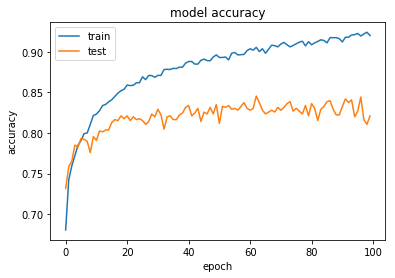

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

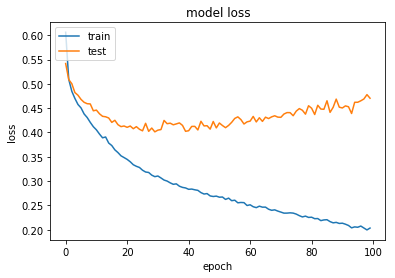

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
model.save('3.model')

In [30]:
new_model = tf.keras.models.load_model('1.model')
predictions = new_model.predict(X[])

In [38]:
np.argmax(predictions[10,:])

1

# CNN

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [18]:
model = Sequential()

model.add(Conv2D(1, (3,3), input_shape = X.shape[1:])) 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(2))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X, np.array(y), batch_size = 1, epochs = 10, validation_split = 0.2)

ValueError: Input 0 of layer conv2d_1 is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: [None, 16, 12]